<a href="https://colab.research.google.com/github/adeolaalabi2017/Pycaret/blob/master/Mobile_Phone_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode activated.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Mobile phone Price Classification/train.csv")
df_unseen = pd.read_csv("/content/drive/My Drive/Mobile phone Price Classification/test.csv")

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df["price_range"].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [ ]:
df.shape

(2000, 21)

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
#import classification module
from pycaret.classification import *

#intialize the setup
Pr_clf1 = setup(df, 
                target = 'price_range',
                normalize = True,
                ignore_low_variance = True, 
                combine_rare_levels = True, 
                rare_level_threshold = 0.10, 
                bin_numeric_features = None, 
                remove_outliers = True, outliers_threshold = 0.05, 
                remove_multicollinearity = False, 
                multicollinearity_threshold = 0.9,
                session_id = 1234)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1234
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(2000, 21)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.922500,0.000000,0.922500,0.923900,0.922300,0.896600
1,Light Gradient Boosting Machine,0.905200,0.000000,0.905200,0.908100,0.905000,0.873500
2,Extreme Gradient Boosting,0.874300,0.000000,0.874600,0.877000,0.873900,0.832400
3,Gradient Boosting Classifier,0.872100,0.000000,0.872300,0.874600,0.871600,0.829400
4,Ada Boost Classifier,0.848800,0.000000,0.849200,0.849500,0.847600,0.798300
5,Decision Tree Classifier,0.778100,0.000000,0.778900,0.796400,0.776400,0.704300
6,Logistic Regression,0.775000,0.000000,0.776000,0.766500,0.768300,0.700000
7,Random Forest Classifier,0.751700,0.000000,0.752500,0.756200,0.749400,0.669100
8,SVM - Linear Kernel,0.742700,0.000000,0.743300,0.747200,0.734700,0.656800
9,Extra Trees Classifier,0.729900,0.000000,0.730200,0.725400,0.722800,0.639800


In [ ]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9098,0.0,0.9093,0.9093,0.9094,0.8797
1,0.9398,0.0,0.9396,0.9440,0.9405,0.9198
2,0.9248,0.0,0.9254,0.9258,0.9243,0.8998
3,0.9474,0.0,0.9470,0.9517,0.9479,0.9298
4,0.8947,0.0,0.8955,0.8967,0.8939,0.8597
5,0.9173,0.0,0.9173,0.9177,0.9174,0.8897
6,0.9398,0.0,0.9403,0.9394,0.9395,0.9198
7,0.9098,0.0,0.9099,0.9095,0.9093,0.8797
8,0.9323,0.0,0.9322,0.9335,0.9316,0.9097
9,0.9091,0.0,0.9088,0.9119,0.9094,0.8788


In [ ]:
tune_catboost = tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9173,0.0,0.9169,0.9170,0.9171,0.8897
1,0.9549,0.0,0.9548,0.9574,0.9553,0.9398
2,0.9323,0.0,0.9325,0.9323,0.9322,0.9098
3,0.9398,0.0,0.9394,0.9456,0.9405,0.9198
4,0.8947,0.0,0.8955,0.8953,0.8937,0.8597
5,0.9023,0.0,0.9021,0.9038,0.9028,0.8696
6,0.9398,0.0,0.9400,0.9407,0.9401,0.9198
7,0.9023,0.0,0.9026,0.9011,0.9006,0.8697
8,0.9323,0.0,0.9322,0.9333,0.9319,0.9097
9,0.8788,0.0,0.8787,0.8805,0.8794,0.8384


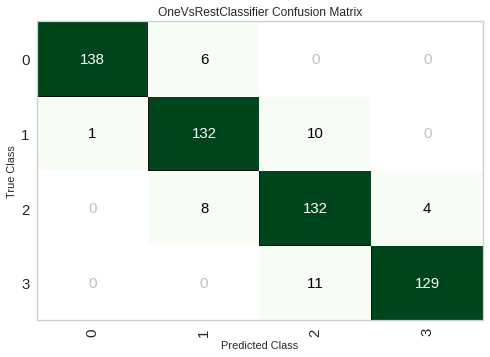

In [ ]:
plot_model(tune_catboost, plot = 'confusion_matrix')

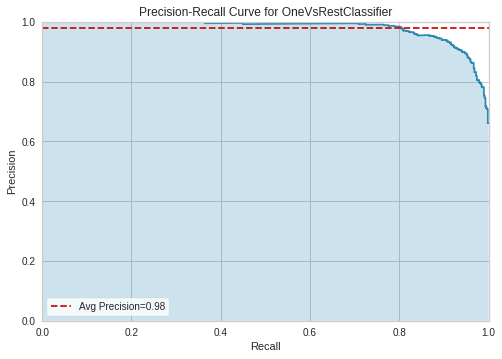

In [ ]:
plot_model(tune_catboost, plot = 'pr')

In [ ]:
test_model = predict_model(tune_catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.9299,0,0.9299,0.9322,0.9306,0.9066


In [ ]:
final_catboost = finalize_model(tune_catboost)

In [ ]:
my_predictions = predict_model(final_catboost, data= df_unseen)
my_predictions.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Label,Score
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3,0.7651
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3,0.9997
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2,0.9885
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3,1.0000
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1,0.9997


In [ ]:
save_model(final_catboost, 'Final Catboost Model 11Feb2020')

Transformation Pipeline and Model Succesfully Saved
